# Laboratory exercise 2

by Bjørn Christian Weinbach

## Problem 1

We want to design a pattern recognition system that classifies 2-dimensional
feature vectors $\boldsymbol{x}$ to class $\omega_1$ or $\omega_2$.

We know:

$$
P(\omega_1) = P(\omega_2) = \frac{1}{2}
$$

And we know that for $\omega_1$:

$$
\mu_1 = (3, 6)^T \qquad \Sigma = 
\begin{pmatrix}
1/2 & 0\\
0 & 2
\end{pmatrix}
$$

And we know that for $\omega_2$:

$$
\mu_2 = (3, -2)^T \qquad \Sigma = 
\begin{pmatrix}
2 & 0\\
0 & 2
\end{pmatrix}
$$

### a) Use norm2D to generate the class-conditional PDF for class 1 from
problem 2 and plot it with red surface color

Text(0.5, 0.92, 'Bivariate Gaussian for $\\omega_i$')

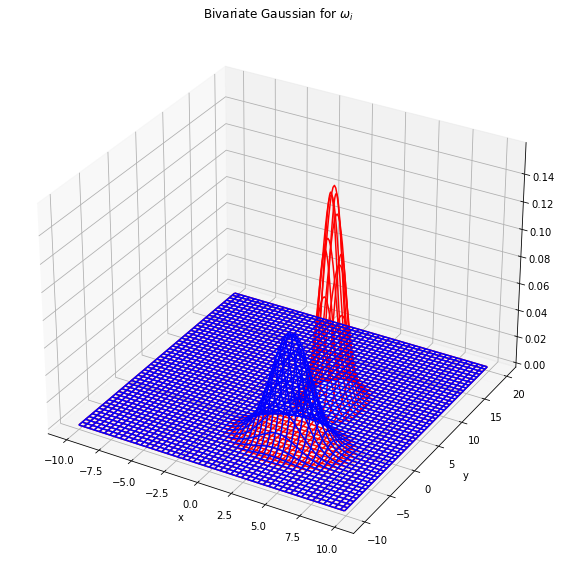

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import sys
sys.path.append("..") # Adds higher directory to python modules path.
import pdffuns

# Parameters for multivariate distributions
mu1 = np.array([3, 6])
mu2 = np.array([3, -2])
sigma1 = np.array([[0.5, 0], [0, 2]])
sigma2 = np.array([[2, 0], [0, 2]])
p1 = 0.5
p2 = 0.5

# Create meshgrid
x1 = np.arange(-10,10,1).reshape(-1,1)
x2 = np.arange(-10,2*10,1).reshape(-1,1)
X, Y = np.meshgrid(x1, x2)

# Calculate distributions
compo1, Z1 = pdffuns.norm2D(mu1, sigma1, X, Y)
compo2, Z2 = pdffuns.norm2D(mu2, sigma2, X, Y)

# Display figure
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection="3d")
ax.plot_wireframe(X,Y,Z1, color='red')
ax.plot_wireframe(X,Y,Z2, color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Bivariate Gaussian for $\omega_i$")

## c) Posterior distributions

Since both have classes have the same distribution of $\frac{1}{2}$, so the posterior
kernels are scaled by the same amount.

Text(0.5, 0.92, 'Bivariate Gaussian for $\\omega_i$')

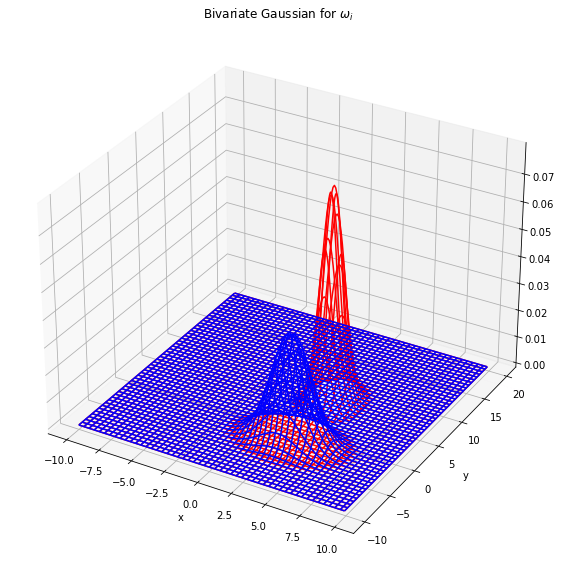

In [2]:
# Display figure
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection="3d")
ax.plot_wireframe(X,Y,p1*Z1, color='red')
ax.plot_wireframe(X,Y,p1*Z2, color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Bivariate Gaussian for $\omega_i$")

### d) Identify the decision boundary and decision areas.

By using bayes classification rule, we can numerically find the decision boundary by choosing the
class that has the highest posterior probability distribution.

Text(0.5, 0.92, 'Bivariate Gaussian for $\\omega_i$')

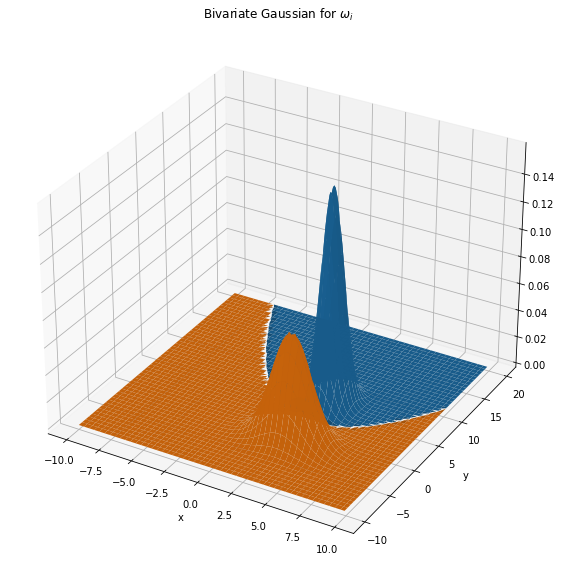

In [3]:
# Remove posterior probability values according to bayes classification rule.
Z1[Z1 < Z2] = np.nan
Z2[Z2 <= Z1] = np.nan

# Display figure
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X,Y,Z1, facecolor='red')
ax.plot_surface(X,Y,Z2, facecolor='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Bivariate Gaussian for $\omega_i$")

### e) Change the prior probabilities

Now

$$
P(\omega_1) = 0.1
$$

and

$$
P(\omega_2) = 0.9
$$

Text(0.5, 0.92, 'Bivariate Gaussian for $\\omega_i$')

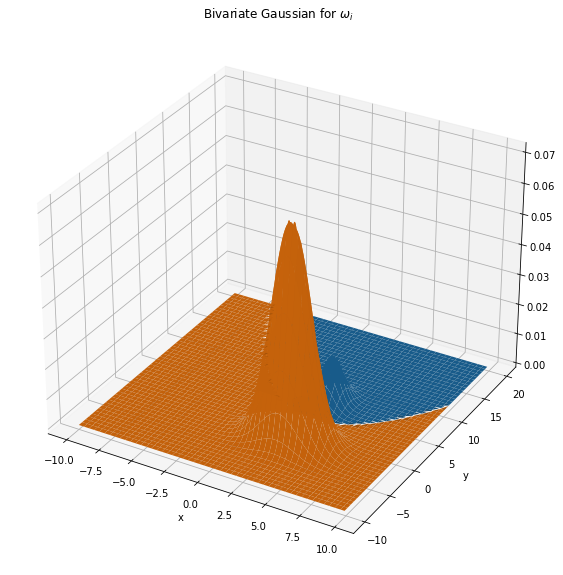

In [4]:
p1 = 0.1
p2 = 0.9

# Calculate distributions
compo1, Z1 = pdffuns.norm2D(mu1, sigma1, X, Y)
compo2, Z2 = pdffuns.norm2D(mu2, sigma2, X, Y)

# Calculate posteriors kernels
Z1 = Z1*p1
Z2 = Z2*p2

# Remove posterior probability values according to bayes classification rule.
Z1[Z1 < Z2] = np.nan
Z2[Z2 <= Z1] = np.nan

# Display figure
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X,Y,Z1, facecolor='red')
ax.plot_surface(X,Y,Z2, facecolor='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Bivariate Gaussian for $\omega_i$")

The decision boundaries are slightly different though this is difficult to see in the plot. This is because the
classes are well seperated. The decision boundary is only moved slightly giving a different intersection.

According to Theodoridis, S. (2020) and equation 7.19, this is due to the discriminant function of the discriminant
function of a gaussian distribution where there is a constant term

$$
\ln \frac{P(\omega_1)}{P(\omega_2)}
$$

### f) Show the posterior probabilities

To calculate the posterior $P(\omega_i|\boldsymbol{x})$ we may use bayes theorem
$$
    P(\omega_i|\boldsymbol{x}) = \frac{P(\omega_i)P(\boldsymbol{x}|\omega_i)}{P(\boldsymbol{x})}
$$

All these terms have been calculated besides $P(\boldsymbol{x})$. This can be calculated like this in
our two class case:

$$
    P(\boldsymbol{x}) = P(\omega_1)P(\boldsymbol{x}|\omega_1) + P(\omega_2)P(\boldsymbol{x}|\omega_2)
$$

Text(0.5, 0.92, 'Bivariate Gaussian for $\\omega_i$')

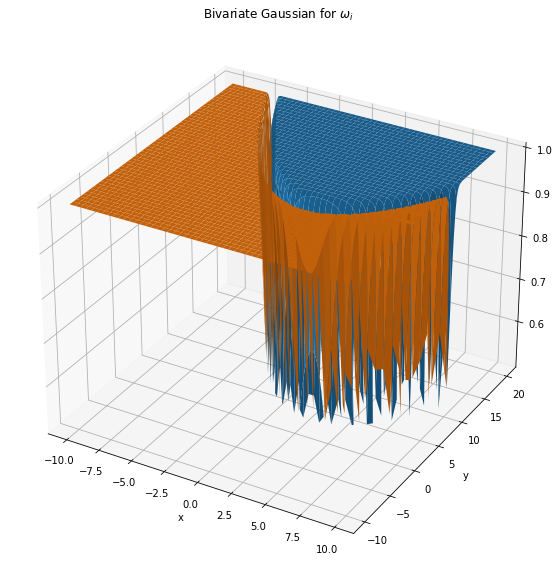

In [5]:
p1 = 0.5
p2 = 0.5

# Calculate distributions
compo1, Z1 = pdffuns.norm2D(mu1, sigma1, X, Y)
compo2, Z2 = pdffuns.norm2D(mu2, sigma2, X, Y)

Z1 = Z1*p1
Z2 = Z2*p2
px = Z1 + Z2

Z1 = np.divide(Z1, px)
Z2 = np.divide(Z2, px)

# Remove posterior probability values according to bayes classification rule.
Z1[Z1 < Z2] = np.nan
Z2[Z2 <= Z1] = np.nan

# Display figure
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X,Y,Z1, facecolor='red')
ax.plot_surface(X,Y,Z2, facecolor='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Bivariate Gaussian for $\omega_i$")

Text(0.5, 0.92, 'Bivariate Gaussian for $\\omega_i$')

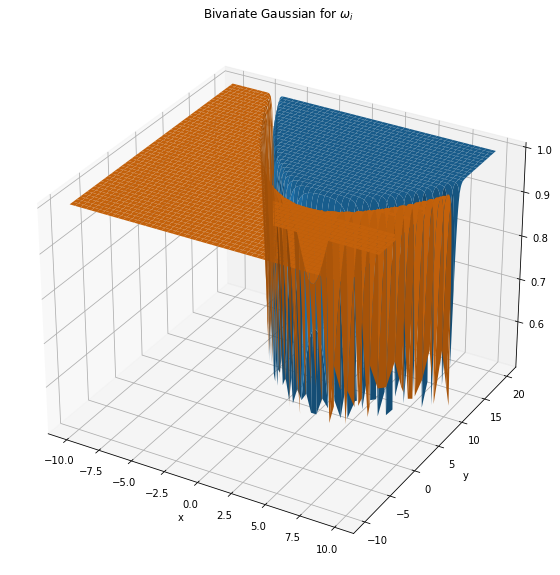

In [6]:
p1 = 0.1
p2 = 0.9

# Calculate distributions
compo1, Z1 = pdffuns.norm2D(mu1, sigma1, X, Y)
compo2, Z2 = pdffuns.norm2D(mu2, sigma2, X, Y)

Z1 = Z1*p1
Z2 = Z2*p2
px = Z1 + Z2

Z1 = np.divide(Z1, px)
Z2 = np.divide(Z2, px)

# Remove posterior probability values according to bayes classification rule.
Z1[Z1 < Z2] = np.nan
Z2[Z2 <= Z1] = np.nan

# Display figure
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X,Y,Z1, facecolor='red')
ax.plot_surface(X,Y,Z2, facecolor='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Bivariate Gaussian for $\omega_i$")

We see that the decision boundaries are very similar to the cases in the previous subtasks with the notable 
difference that the value of the plots are true probabilities (between 0 and 1).